# main

In [49]:
import re
import pandas as pd
import os
import pickle
import seaborn as sns
import numpy as np

root_path="/Users/jiahang/Documents/dagma/src/dagma/simulated_data/"

def get_res(filename, interval):
    pattern = r"thresh (\d+\.\d+) \| est fdr (\d+\.\d+) \| true fdr (\d+\.\d+) \| true power (\d+\.\d+)"
    
    logs = []
    with open(filename, 'r') as file:
        lines = file.readlines()
        for line in lines[interval[0]:interval[1]]:  # choose the first line - 1 : the last line
            match = re.search(pattern, line)
            if match:
                logs.append(match.groups())
    df = pd.DataFrame(logs, columns=["thresh", "est fdr", "true fdr", "true power"])
    return df

# Fitting curve

In [6]:
df = {}

idx = 63
data_version = 23
n_nodes = 40
alpha = 1
filename = f"/Users/jiahang/Documents/dagma/src/dagma/logs/log_{idx}/log_{data_version}_{n_nodes}_{alpha}"
df[idx] = get_res(filename, interval = [0, -1])

idx = 64
data_version = 24
n_nodes = 40
alpha = 0.3
filename = f"/Users/jiahang/Documents/dagma/src/dagma/logs/log_{idx}/log_{data_version}_{n_nodes}_{alpha}"
df[idx] = get_res(filename, interval = [0, -1])

idx = 65
data_version = 25
n_nodes = 40
alpha = 0.3
filename = f"/Users/jiahang/Documents/dagma/src/dagma/logs/log_{idx}/log_{data_version}_{n_nodes}_{alpha}"
df[idx] = get_res(filename, interval = [0, -1])

idx = 66
data_version = 26
n_nodes = 40
alpha = 0.3
filename = f"/Users/jiahang/Documents/dagma/src/dagma/logs/log_{idx}/log_{data_version}_{n_nodes}_{alpha}"
df[idx] = get_res(filename, interval = [0, -1])

idx = 67
data_version = 27
n_nodes = 40
alpha = 0.3
filename = f"/Users/jiahang/Documents/dagma/src/dagma/logs/log_{idx}/log_{data_version}_{n_nodes}_{alpha}"
df[idx] = get_res(filename, interval = [0, -1])

idx = 68
data_version = 28
n_nodes = 40
alpha = 0.3
filename = f"/Users/jiahang/Documents/dagma/src/dagma/logs/log_{idx}/log_{data_version}_{n_nodes}_{alpha}"
df[idx] = get_res(filename, interval = [0, -1])

idx = 69
data_version = 29
n_nodes = 40
alpha = 0.3
filename = f"/Users/jiahang/Documents/dagma/src/dagma/logs/log_{idx}/log_{data_version}_{n_nodes}_{alpha}"
df[idx] = get_res(filename, interval = [0, -1])

idx = 70
data_version = 30
n_nodes = 40
alpha = 0.1
filename = f"/Users/jiahang/Documents/dagma/src/dagma/logs/log_{idx}/log_{data_version}_{n_nodes}_{alpha}"
df[idx] = get_res(filename, interval = [0, -1])

idx = 71
data_version = 31
n_nodes = 40
alpha = 0.1
filename = f"/Users/jiahang/Documents/dagma/src/dagma/logs/log_{idx}/log_{data_version}_{n_nodes}_{alpha}"
df[idx] = get_res(filename, interval = [0, -1])

idx = 72
data_version = 32
n_nodes = 40
alpha = -1
filename = f"/Users/jiahang/Documents/dagma/src/dagma/logs/log_{idx}/log_{data_version}_{n_nodes}_{alpha}"
df[idx] = get_res(filename, interval = [0, -1])

In [7]:
df.keys()

dict_keys([63, 64, 65, 66, 67, 68, 69, 70, 71, 72])

In [8]:
labels = {
    63: "no deconv",
    64: "deconv_1",
    65: "deconv_2",
    66: "deconv_1, iter=8e4",
    67: "deconv_2, iter=8e4",
    68: "deconv_1, dir_loss",
    69: "deconv_2, dir_loss",
    70: "deconv_1, a=0.1, dir_loss",
    71: "deconv_2, a=0.1, dir_loss",
    # 72: "T=6",
}

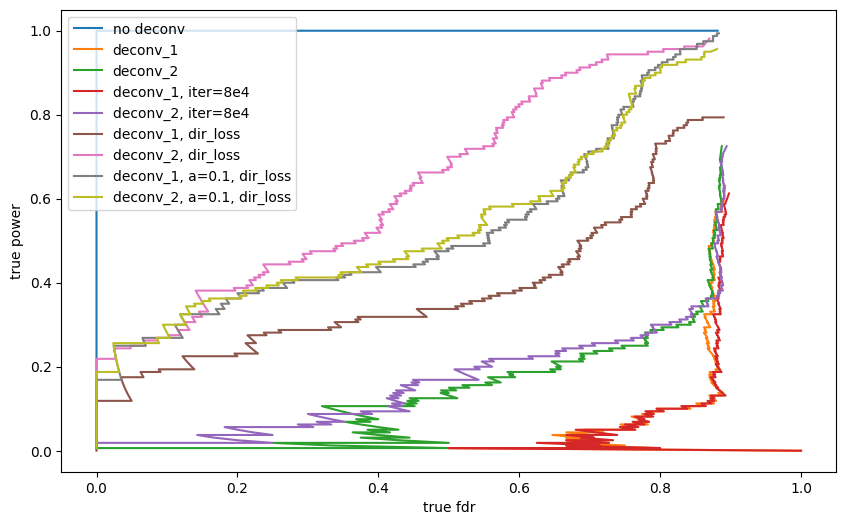

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for key, val in labels.items():
    plt.plot(df[key]['true fdr'].values.astype(float), df[key]['true power'].values.astype(float), label=val)
plt.xlabel("true fdr")
plt.ylabel("true power")
plt.legend()
plt.show()

In [18]:
labels

{63: 'no deconv',
 64: 'deconv_1',
 65: 'deconv_2',
 66: 'deconv_1, iter=8e4',
 67: 'deconv_2, iter=8e4',
 68: 'deconv_1, dir_loss',
 69: 'deconv_2, dir_loss',
 70: 'deconv_1, a=0.1, dir_loss',
 71: 'deconv_2, a=0.1, dir_loss'}

# FDR control

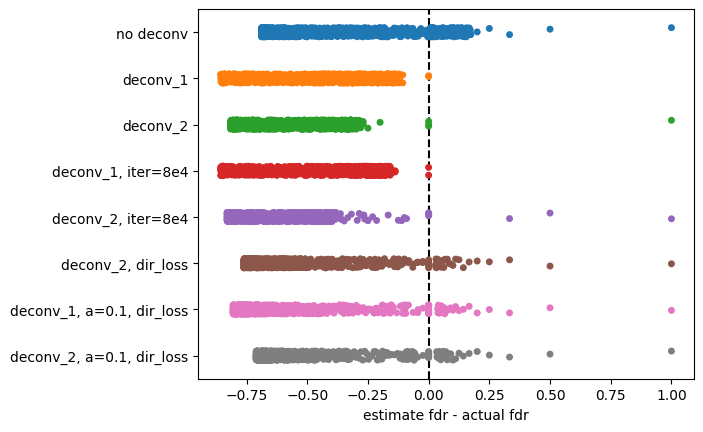

In [16]:
import seaborn as sns
_labels = labels.copy()
_labels.pop(68)
ax = sns.stripplot(
    [
        df[key]['est fdr'].values.astype(float) - df[key]['true fdr'].values.astype(float) \
        for key in _labels.keys()
    ], orient='h')

ax.set_yticks(list(range(len(_labels))), (_labels.values()))
ax.set_xlabel("estimate fdr - actual fdr")
plt.axvline(x=0, color='black', ls='--')
plt.show()

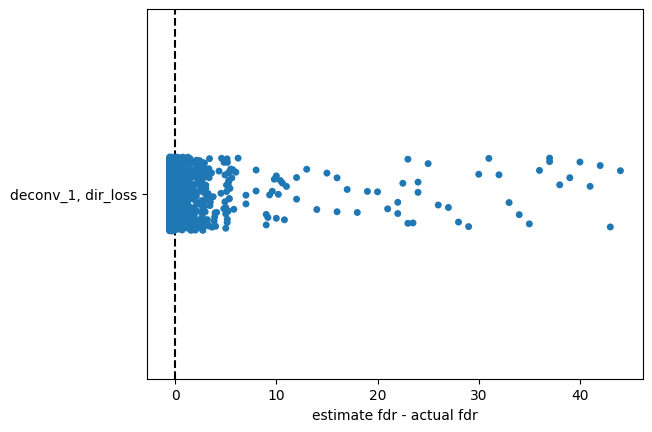

In [20]:
import seaborn as sns
_labels = {68: labels[68]}
ax = sns.stripplot(
    [
        df[key]['est fdr'].values.astype(float) - df[key]['true fdr'].values.astype(float) \
        for key in _labels.keys()
    ], orient='h')
ax.set_yticks(list(range(len(_labels))), (_labels.values()))
ax.set_xlabel("estimate fdr - actual fdr")
plt.axvline(x=0, color='black', ls='--')
plt.show()

# deconv_1, 2, baseline, edge weights distributions and fdr curve

## baseline

In [58]:
with open(os.path.join(root_path, 'v23/v23_1/v40/W/W_1_0.pkl'), 'rb') as f:
    W = pickle.load(f)
with open(os.path.join(root_path, 'v23/v23_1/v40/X/X_1.pkl'), 'rb') as f:
    X = pickle.load(f)
n_nodes = 40
W_est = W['W_est']
W = W['W_est'][:, :n_nodes]
Z = np.abs(W[:n_nodes]) - np.abs(W[n_nodes:])
W_true = X['W_true']
B_true = (W_true != 0)

<Axes: >

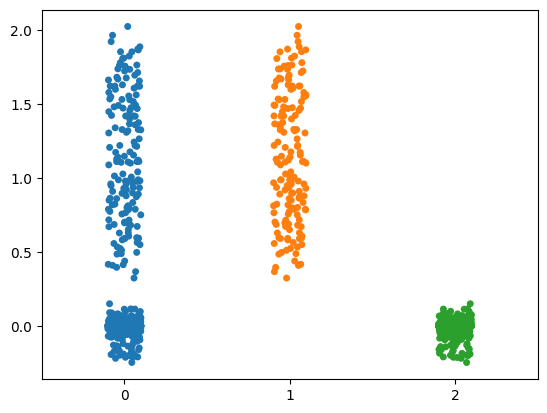

In [51]:
sns.stripplot([Z.flatten(), Z[B_true].flatten(), Z[~B_true].flatten()])

<Axes: ylabel='Count'>

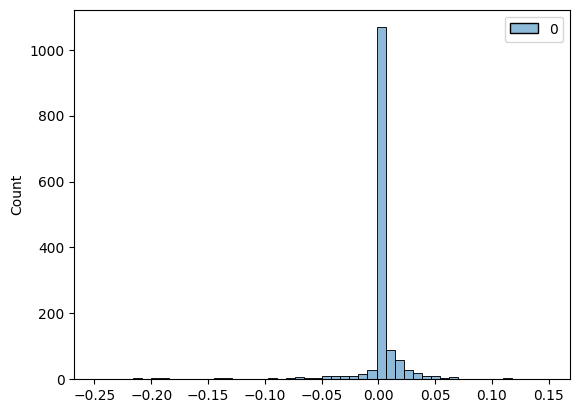

In [55]:
sns.histplot([Z[~B_true].flatten()], bins=50)

## mask: H0 with |W0| > |\tilde W0|, that is, Z0 > 0

In [59]:
mask = (Z > 0.) & (~B_true)

In [82]:
def W2Z(W, mask=None):
    if mask is None:
        return np.abs(W[:n_nodes, :n_nodes]) - np.abs(W[n_nodes:, :n_nodes])
    else:
        return (np.abs(W[:n_nodes, :n_nodes]) - np.abs(W[n_nodes:, :n_nodes]))[mask]
W1 = W_est
Z1 = W2Z(W1, mask)
W2 = np.linalg.matrix_power(W_est, 2)
Z2 = W2Z(W2, mask)
W3 = np.linalg.matrix_power(W_est, 3)
Z3 = W2Z(W3, mask)
W4 = np.linalg.matrix_power(W_est, 4)
Z4 = W2Z(W4, mask)

In [91]:
(Z1 > 0.).sum() / Z1.size

1.0

In [90]:
(Z2 > 0.).sum() / Z2.size

0.4143968871595331

In [92]:
(Z3 > 0.).sum() / Z3.size

0.2898832684824903

In [148]:
res = {"n_nodes": [], "seed": [], "Z2": [], "Z3": [], "Z4": []}
for n_nodes in [40, 60, 80, 100]:
    for seed in [1, 2, 3, 4, 5]:
        with open(os.path.join(root_path, f'v11/v{n_nodes}/W/W_{seed}_0.pkl'), 'rb') as f:
            W = pickle.load(f)
        with open(os.path.join(root_path, f'v11/v{n_nodes}/X/X_1.pkl'), 'rb') as f:
            X = pickle.load(f)
        W_est = W['W_est']
        W = W['W_est'][:, :n_nodes]
        Z = np.abs(W[:n_nodes]) - np.abs(W[n_nodes:])
        W_true = X['W_true']
        B_true = (W_true != 0)
        
        W1 = W_est
        Z1 = W2Z(W1)
        W2 = np.linalg.matrix_power(W_est, 2)
        Z2 = W2Z(W2)
        W3 = np.linalg.matrix_power(W_est, 3)
        Z3 = W2Z(W3)
        W4 = np.linalg.matrix_power(W_est, 4)
        Z4 = W2Z(W4)

        mask = (Z > 0) & (~B_true)
        print(f"n_nodes {n_nodes} | seed {seed}")
        print((Z2[mask] > 0).sum() / Z2[mask].size)
        print((Z3[mask] > 0).sum() / Z3[mask].size)
        print((Z4[mask] > 0).sum() / Z4[mask].size)
        print(f"====================")
        res["n_nodes"].append(n_nodes)
        res["seed"].append(seed)
        res["Z2"].append((Z2[mask] > 0).sum() / Z2[mask].size)
        res["Z3"].append((Z3[mask] > 0).sum() / Z3[mask].size)
        res["Z4"].append((Z4[mask] > 0).sum() / Z4[mask].size)
res = pd.DataFrame(res)

n_nodes 40 | seed 1
0.47664543524416136
0.3184713375796178
0.28343949044585987
n_nodes 40 | seed 2
0.5102249488752556
0.3292433537832311
0.2740286298568507
n_nodes 40 | seed 3
0.5300101729399797
0.3743641912512716
0.3316378433367243
n_nodes 40 | seed 4
0.5398963730569948
0.3544041450777202
0.31813471502590673
n_nodes 40 | seed 5
0.5464646464646464
0.3888888888888889
0.33131313131313134
n_nodes 60 | seed 1
0.7238805970149254
0.5543117744610282
0.4821724709784411
n_nodes 60 | seed 2
0.726825266611977
0.5746513535684987
0.5102543068088597
n_nodes 60 | seed 3
0.7520391517128875
0.6035889070146819
0.5301794453507341
n_nodes 60 | seed 4
0.6138737985791893
0.42081069786878395
0.35144170497283744
n_nodes 60 | seed 5
0.45243314335817625
0.2981148619026743
0.2476983779044279
n_nodes 80 | seed 1
0.6943759802823213
0.4942863544700874
0.41922473672417654
n_nodes 80 | seed 2
0.7546191978368635
0.5824695808922938
0.5067598017124831
n_nodes 80 | seed 3
0.6729772368717603
0.46698219517692136
0.38787469

## mask: H0 with |W0|_n < |\tilde W0|_n, that is, Z0_n < 0

In [104]:
W1 = W_est
Z1 = W2Z(W1)
W2 = np.linalg.matrix_power(W_est, 2)
Z2 = W2Z(W2)
W3 = np.linalg.matrix_power(W_est, 3)
Z3 = W2Z(W3)
W4 = np.linalg.matrix_power(W_est, 4)
Z4 = W2Z(W4)

In [118]:
mask2 = (Z2 < 0) & (~B_true)
(Z1[mask2] > 0).sum() / Z1[mask2].size

0.732360097323601

In [119]:
mask3 = (Z3 < 0) & (~B_true)
(Z1[mask3] > 0).sum() / Z1[mask3].size

0.7366296670030272

In [120]:
mask4 = (Z4 < 0) & (~B_true)
(Z1[mask4] > 0).sum() / Z1[mask4].size

0.7357414448669202


## mask: H0 with |W0| < |\tilde W0|, that is, Z0 < 0

In [96]:
mask = (Z < 0.) & (~B_true)
Z1 = W2Z(W1, mask)
Z2 = W2Z(W2, mask)
Z3 = W2Z(W3, mask)
Z4 = W2Z(W4, mask)

In [103]:
print((Z1 < 0.).sum() / Z1.size)
print((Z2 < 0.).sum() / Z2.size)
print((Z3 < 0.).sum() / Z3.size)
print((Z4 < 0.).sum() / Z4.size)

1.0
0.6666666666666666
0.7389558232931727
0.7670682730923695


# test the assumption on other cases

## 40 nodes, but 2, 3, 4, 5 knockoff seeds

In [138]:
res = {"n_nodes": [], "seed": [], "Z2": [], "Z3": [], "Z4": []}
for n_nodes in [40, 60, 80, 100]:
    for seed in [1, 2, 3, 4, 5]:
        with open(os.path.join(root_path, f'v11/v{n_nodes}/W/W_{seed}_0.pkl'), 'rb') as f:
            W = pickle.load(f)
        with open(os.path.join(root_path, f'v11/v{n_nodes}/X/X_1.pkl'), 'rb') as f:
            X = pickle.load(f)
        W_est = W['W_est']
        W = W['W_est'][:, :n_nodes]
        Z = np.abs(W[:n_nodes]) - np.abs(W[n_nodes:])
        W_true = X['W_true']
        B_true = (W_true != 0)
        
        W1 = W_est
        Z1 = W2Z(W1)
        W2 = np.linalg.matrix_power(W_est, 2)
        Z2 = W2Z(W2)
        W3 = np.linalg.matrix_power(W_est, 3)
        Z3 = W2Z(W3)
        W4 = np.linalg.matrix_power(W_est, 4)
        Z4 = W2Z(W4)

        print(f"n_nodes {n_nodes} | seed {seed}")
        mask2 = (Z2 < 0) & (~B_true)
        print((Z1[mask2] > 0).sum() / Z1[mask2].size)
        mask3 = (Z3 < 0) & (~B_true)
        print((Z1[mask3] > 0).sum() / Z1[mask3].size)
        mask4 = (Z4 < 0) & (~B_true)
        print((Z1[mask4] > 0).sum() / Z1[mask4].size)
        print(f"====================")
        res["n_nodes"].append(n_nodes)
        res["seed"].append(seed)
        res["Z2"].append((Z1[mask2] > 0).sum() / Z1[mask2].size)
        res["Z3"].append((Z1[mask3] > 0).sum() / Z1[mask3].size)
        res["Z4"].append((Z1[mask4] > 0).sum() / Z1[mask4].size)
res = pd.DataFrame(res)

n_nodes 40 | seed 1
0.596130592503023
0.6331360946745562
0.6338028169014085
n_nodes 40 | seed 2
0.6420911528150134
0.6769865841073271
0.6685499058380414
n_nodes 40 | seed 3
0.616822429906542
0.6612903225806451
0.655688622754491
n_nodes 40 | seed 4
0.6149584487534626
0.664179104477612
0.6593186372745491
n_nodes 40 | seed 5
0.6323943661971831
0.6744704570791528
0.676200204290092
n_nodes 60 | seed 1
0.5925266903914591
0.6701995012468828
0.6866410115448048
n_nodes 60 | seed 2
0.6201117318435754
0.672939649578196
0.6842406876790831
n_nodes 60 | seed 3
0.5954946131243879
0.6657534246575343
0.6832740213523132
n_nodes 60 | seed 4
0.6209677419354839
0.6794117647058824
0.6891651865008881
n_nodes 60 | seed 5
0.6461458872219348
0.6684759916492693
0.667704280155642
n_nodes 80 | seed 1
0.666015625
0.7160532994923858
0.7210013908205841
n_nodes 80 | seed 2
0.6402116402116402
0.7026924535456959
0.7134941329856584
n_nodes 80 | seed 3
0.6622546782291191
0.7078718946423227
0.7188988883006882
n_nodes 80 | 

In [146]:
res = {"n_nodes": [], "seed": [], "Z2": [], "Z3": [], "Z4": []}
for n_nodes in [40, 60, 80, 100]:
    for seed in [1, 2, 3, 4, 5]:
        with open(os.path.join(root_path, f'v11/v{n_nodes}/W/W_{seed}_0.pkl'), 'rb') as f:
            W = pickle.load(f)
        with open(os.path.join(root_path, f'v11/v{n_nodes}/X/X_1.pkl'), 'rb') as f:
            X = pickle.load(f)
        W_est = W['W_est']
        W = W['W_est'][:, :n_nodes]
        Z = np.abs(W[:n_nodes]) - np.abs(W[n_nodes:])
        W_true = X['W_true']
        B_true = (W_true != 0)
        
        W1 = W_est
        Z1 = W2Z(W1)
        W2 = np.linalg.matrix_power(W_est, 2)
        Z2 = W2Z(W2)
        W3 = np.linalg.matrix_power(W_est, 3)
        Z3 = W2Z(W3)
        W4 = np.linalg.matrix_power(W_est, 4)
        Z4 = W2Z(W4)

        print(f"n_nodes {n_nodes} | seed {seed}")
        mask2 = (Z2 > 0) & (~B_true)
        print((Z1[mask2] > 0).sum() / Z1[mask2].size)
        mask3 = (Z3 > 0) & (~B_true)
        print((Z1[mask3] > 0).sum() / Z1[mask3].size)
        mask4 = (Z4 > 0) & (~B_true)
        print((Z1[mask4] > 0).sum() / Z1[mask4].size)
        print(f"====================")
        res["n_nodes"].append(n_nodes)
        res["seed"].append(seed)
        res["Z2"].append((Z1[mask2] > 0).sum() / Z1[mask2].size)
        res["Z3"].append((Z1[mask3] > 0).sum() / Z1[mask3].size)
        res["Z4"].append((Z1[mask4] > 0).sum() / Z1[mask4].size)
res = pd.DataFrame(res)

n_nodes 40 | seed 1
0.732463295269168
0.704225352112676
0.712
n_nodes 40 | seed 2
0.7190201729106628
0.6836518046709129
0.708994708994709
n_nodes 40 | seed 3
0.7539797395079595
0.7215686274509804
0.7442922374429224
n_nodes 40 | seed 4
0.7256267409470752
0.6812749003984063
0.6945701357466063
n_nodes 40 | seed 5
0.7410958904109589
0.7090239410681399
0.7114967462039046
n_nodes 60 | seed 1
0.7808586762075134
0.7613895216400911
0.754704737183647
n_nodes 60 | seed 2
0.7751531058617673
0.7702034084661902
0.7702786377708978
n_nodes 60 | seed 3
0.7883710987601539
0.7789473684210526
0.7765830346475507
n_nodes 60 | seed 4
0.7847222222222222
0.7628787878787879
0.7590252707581228
n_nodes 60 | seed 5
0.7231955150665732
0.7046632124352331
0.7151898734177216
n_nodes 80 | seed 1
0.7686011904761905
0.7534153005464481
0.7529175050301811
n_nodes 80 | seed 2
0.7647864809317195
0.7507987220447284
0.7466799468791501
n_nodes 80 | seed 3
0.7678066340961687
0.7564804673238408
0.7476107732406603
n_nodes 80 | see